# Παραδοτέο 1

## Ερώτημα 1

Το συγκεκριμένο γεγονός δεν αποτελεί πρόβλημα, καθώς η κατανομή είναι αναλλοίωτη και η κατάσταση 1 είναι γνησίως επαναληπτική, οπότε για την κατανομή ισχύει $\pi_n \rightarrow \pi_0$, και έτσι επαναλαμβάνονται με τον ίδιο τρόπο μετά τη στιγμή που φτάνει στην κατάσταση 1 ξανά, οπότε είναι το ίδιο με το να είναι ανεξάρτητες οι $X_i$.

## Ερώτημα 2

Ο κώδικας φαίνεται στο αμέσως επόμενο κελί. Για να υπολογίσουμε την $\pi_1$, αξιοποιήσαμε τους αριθμούς επισκέψεων σε κάθε κατάσταση, μέχρι η αλυσίδα να επιστρέψει στην κατάσταση 1. Γνωρίζουμε ότι $\sum_{y \in \mathbb{X}} \pi_x (y) = \frac{1}{\mathbb{E}_x[{T_x}^+]}$ $\sum_{y \in \mathbb{X}} \mathbb{E}_x [ \sum\limits_{k=1}^{{T_x}^+} \mathbb{1} \{X_k = y\} = 1$, και αφού οι  $\sum\limits_{k=1}^{{T_x}^+} \mathbb{1} \{X_k = y\}$ (αριθμοί επισκέψεων) έχουν υπολογιστεί, αρκεί να βρούμε το ${\mathbb{E}_x[{T_x}^+]}$. Aυτή η τιμή αντιστοιχεί στην $\pi_x (x)$ και είναι η ζητούμενη κατανομή, δηλαδή αντιπροσωπεύει τον αριθμό φορών που περάσαμε από την κατάσταση 1, μέχρι το χρόνο διακοπής ${{T_x}^+}$.
 
Θεωρητικά, η $\pi_1$ προκύπτει ως εξής: από τον πίνακα μεταβάσεων έχουμε:
<center>$\pi_1 = 1/3 \pi_2 + 3/5 \pi_4$</center>
<center>$\pi_2 = 1/2 \pi_1$ </center>
<center>$\pi_3 = 1/2 \pi_1 + 4/5 \pi_3$</center>
<center>$\pi_4 = 2/3 \pi_2 + 1/5 \pi_3 + 2/5 \pi_4$</center>
<center>$\pi_1 + \pi_2 + \pi_3 + \pi_4 = 1$</center>

οπότε με εκτέλεση τον πράξεων προκύπτει $\pi_1 = 0.185567$, μια τιμή που συμφωνεί με την πειραματική μας παρατήρηση. 

Παρατηρούμε ότι η διασπορά των αποτελεσμάτων είναι πολύ μικρή, που σημαίνει ότι η εκτίμησή μας είναι αρκετά ακριβής. 



In [1]:
from simple_markov_chain_lib import markov_chain
import numpy as np
import statistics as stat

## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

init_dist = {1: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.

mc = markov_chain(markov_table, init_dist)

N = 100_000
data = np.zeros(3, dtype=float)

for i in range(3):
    visits = {state: 0 for state in (1, 2, 3, 4)} 
    mc.start()
    completed = 0

    while completed < N:
        visits[mc.running_state] += 1
        mc.move()
        if mc.running_state == 1:
            completed +=1

    my_sum = 0

    print("Expected Visits starting from 1:")
    for x, y in visits.items():
        my_sum += (y / N)
        print("%d: %.3f" % (x, y / N))
        
    data[i] = (1/my_sum)
    print ("p_1 = %.6f" % data[i])

print ("\n")
print ("Variance of estimates is %.10f" % (stat.variance(data)))

Expected Visits starting from 1:
1: 1.000
2: 0.497
3: 2.515
4: 1.390
p_1 = 0.185119
Expected Visits starting from 1:
1: 1.000
2: 0.501
3: 2.497
4: 1.391
p_1 = 0.185564
Expected Visits starting from 1:
1: 1.000
2: 0.501
3: 2.493
4: 1.383
p_1 = 0.185972


Variance of estimates is 0.0000001822


# Ερώτημα 3

Για να βρούμε τις κατανομές $\pi_2, \pi_3, \pi_4$ πρέπει ουσιαστικά να αλλάξουμε την $init\_dist$. Αυτό φαίνεται στο κομμάτι κώδικα που παρατίθεται αμέσως μετά. Και πάλι, οι τιμές που προκύπτουν συμφωνούν με αυτές που προέκυψαν από τη λύση του συστήματος στο προηγούμενο ερώτημα. Eπιβεβαιώνεται ότι $\pi_1 + \pi_2 + \pi_3 + \pi_4 = 1$, όπως περιμέναμε. 

In [2]:
for i in {1,2,3,4}:
    init_dist = {i: 1.0}
    
    mc = markov_chain(markov_table, init_dist)

    N = 100_000

    visits = {state: 0 for state in (1, 2, 3, 4)} 
    mc.start()
    completed = 0

    while completed < N:
        visits[mc.running_state] += 1
        mc.move()
        if mc.running_state == i:
            completed +=1

    my_sum = 0

    print("Expected Visits starting from %d:" % i)


    for x, y in visits.items():
        my_sum += (y / N)
        print("%d: %.3f" % (x, y / N))
        
    print ("p_%d = %.6f \n" % (i, 1/my_sum))



Expected Visits starting from 1:
1: 1.000
2: 0.500
3: 2.495
4: 1.387
p_1 = 0.185828 

Expected Visits starting from 2:
1: 1.990
2: 1.000
3: 4.970
4: 2.755
p_2 = 0.093328 

Expected Visits starting from 3:
1: 0.397
2: 0.198
3: 1.000
4: 0.547
p_3 = 0.466692 

Expected Visits starting from 4:
1: 0.720
2: 0.359
3: 1.788
4: 1.000
p_4 = 0.258572 



# Παραδοτέο 2

## Ερώτημα 1

In [17]:
from numpy import random, pi

N = 1_000_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y, acc_z = [], [], []  # accepted x, y
rej_x, rej_y, rej_z = [], [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y, z = random.uniform(-1,1,3)
    sumy = x**2 + y**2 + z**2
    if sumy < 1:
        acc_x.append(x)
        acc_y.append(y)
        acc_z.append(z)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)
        rej_z.append(z)
        
x0 = 8*Nhits/Ntrials
x1 = 4*pi/3
print("Monte Carlo estimator of V(3) : %.5f" % (x0))
print("Actual value of V(3) up to 5 decimal digits: %.5f" % (x1))
print("The relative error is %.5f%%" % (100 * abs(1- x0/x1)))

Monte Carlo estimator of V(3) : 4.18897
Actual value of V(3) up to 5 decimal digits: 4.18879
The relative error is 0.00426%


## Ερώτημα 2

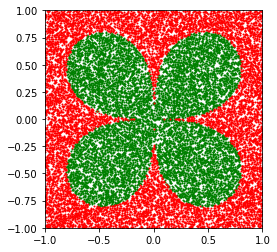

Number of samples needed S 19918


In [13]:
import matplotlib.pyplot as plt

N = 10_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

data = np.zeros(N, dtype=float)

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if ((x**2 + y**2)**2) < (2* abs(x*y)):
        acc_x.append(x)
        acc_y.append(y)
        data[Nhits] = abs(x+y)      # this will be of use for next question, where we have to calculate E[|x+y|]
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

print("Number of samples needed S %d" % Ntrials)



## Ερώτημα 3

Το εμβαδόν του λημνίσκου, από τον τύπο, υπολογίζεται ως εξής: $ p = \frac{\left|\,D \,\right|}{\left|\, S \,\right|} = \frac{\ L}{4} $, άρα αρκεί να πολλαπλασιάσουμε την εκτίμηση $Nhits/ Ntrials$ επί 4, για να βρούμε το $L$. 

Στο προηγούμενο ερώτημα που περιλαμβάνει τον κώδικα επιλογής σημείων που ανήκουν στον λημνίσκο, προσθέσαμε έναν πίνακα στον οποίο θα διατηρήσουμε τις τιμές |$x_1 + x_2$|, προκειμένου να υπολογίσουμε την $\mathbb{E}[|X_1 + X_2|]$ που σε όλα τα σημεία εντός του λημνίσκου, προκύπτει ως $I/L$. Έτσι, πολλαπλασιάζοντας επί το εμβαδόν $L$ βρίσκουμε το ζητούμενο ολοκλήρωμα $I$. 

In [10]:
print("Monte Carlo estimator of lemniscate area L : %.5f" % (4 * Nhits / Ntrials))

print("Price of integral along lemniscate I : %f" % (stat.mean(data) * (4 * Nhits / Ntrials)))

Monte Carlo estimator of lemniscate area L : 1.99223
Price of integral along lemniscate I : 0.369662
